# WINE QUALITY - Support Vector Machines (SVM) (with both Linear and RBF kernels)
#  Purpose

The purpose of this notebook is to implement and compare **Support Vector Machine (SVM)** models with both **Linear** and **RBF kernels** on a **pre-standardized wine dataset**.  
This notebook demonstrates a full end-to-end supervised learning workflow — from data loading, exploration, and balancing, to model training, evaluation, and visualization.

**Main Objectives:**
- Load, inspect, and explore the `Wine_clean.csv` dataset.  
- Analyze dataset structure and feature relationships using descriptive statistics and visualizations.  
- Address **class imbalance** using a combination of **SMOTE** (Synthetic Minority Oversampling) and **RandomUnderSampler**.  
- Train two SVM models:
  - **Linear Kernel SVM** – for linearly separable data.
  - **RBF Kernel SVM** – for non-linear decision boundaries.
- Evaluate both models using **accuracy**, **classification reports**, **confusion matrices**, and **ROC-AUC scores**.
- Compare model performance visually with a **bar chart** of accuracy results.

---

#  Contents

1. **Import Required Libraries**  

2. **Load and Prepare Dataset**  

3. **Exploratory Data Analysis (EDA)**  

4. **Data Preparation and Balancing**  

5. **Model Training: Support Vector Machines (SVM)**  

6. **Model Evaluation**  

7. **Model Comparison**  

8. **Conclusion**  

---




# Support Vector Machines (SVM) (with both Linear and RBF kernels)
- SVM (Support Vector Machine) is a supervised learning algorithm commonly used for classification (and sometimes regression).
Its main goal is to find a hyperplane in the feature space that best separates the classes while maximizing the margin — the distance between the hyperplane and the nearest data points of each class.
- When the data is not linearly separable in the original feature space, SVM uses a technique called the kernel trick to map the data into a higher-dimensional space, where a linear hyperplane can effectively separate the classes.

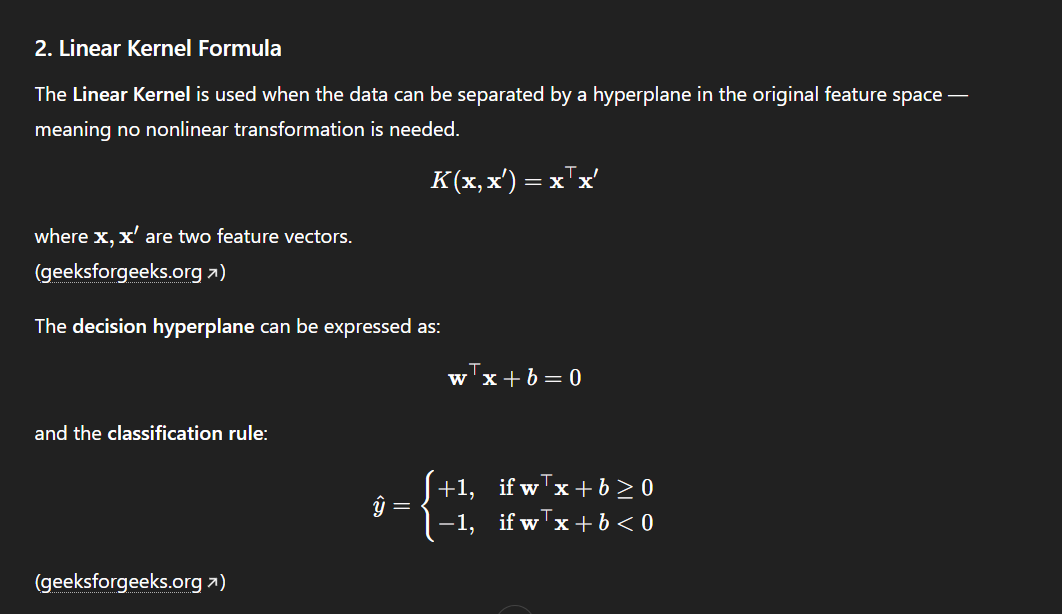

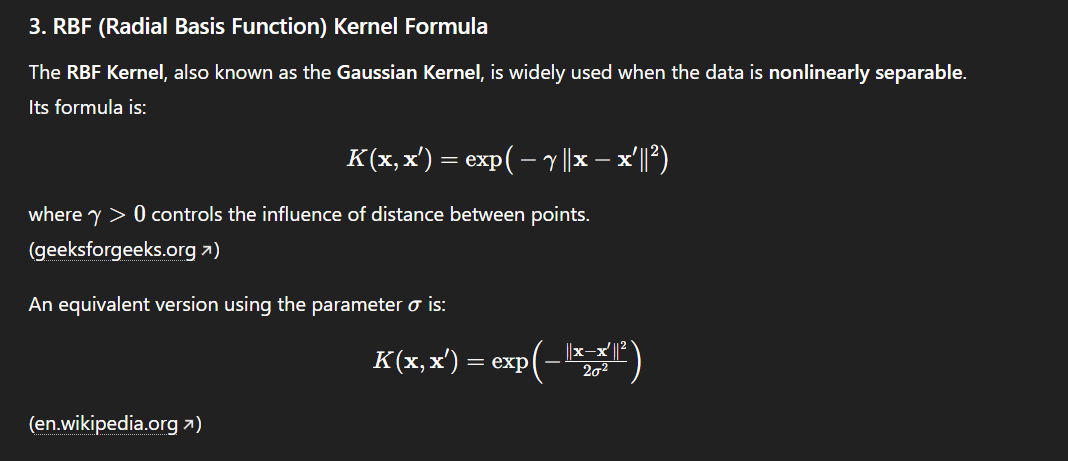

1. **Import Required Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

# Visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


2. **Load and Prepare Dataset**

In [ ]:
# Load dataset
df = pd.read_csv("Data/Wine_clean.csv")

# Remove unnamed index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(" Dataset loaded successfully!")
display(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Statistical Description ---")
display(df.describe())


 Dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1194 non-null   float64
 1   volatile acidity      1194 non-null   float64
 2   citric acid           1194 non-null   float64
 3   residual sugar        1194 non-null   float64
 4   chlorides             1194 non-null   float64
 5   free sulfur dioxide   1194 non-null   float64
 6   total sulfur dioxide  1194 non-null   float64
 7   density               1194 non-null   float64
 8   pH                    1194 non-null   float64
 9   sulphates             1194 non-null   float64
 10  alcohol               1194 non-null   float64
 11  quality               1194 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.1 KB

--- Statistical Description ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1194.000000
mean,4.284680e-16,-9.521511e-17,7.141133e-17,-2.856453e-16,-1.904302e-16,-5.950944e-17,1.071170e-16,7.236348e-15,3.511057e-16,-6.188982e-16,1.737676e-15,5.640704
std,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,0.766471
min,-2.099646e+00,-2.443625e+00,-1.377452e+00,-2.230359e+00,-2.621812e+00,-1.588798e+00,-1.386636e+00,-2.632285e+00,-2.907515e+00,-2.601823e+00,-1.707596e+00,3.000000
25%,-7.302743e-01,-8.053775e-01,-9.333346e-01,-6.465576e-01,-6.630112e-01,-7.947313e-01,-7.729942e-01,-6.665470e-01,-7.118025e-01,-7.076739e-01,-8.872630e-01,5.000000
50%,-2.509942e-01,-1.659184e-02,-4.509986e-02,-1.940431e-01,-3.339664e-02,-2.275411e-01,-2.360579e-01,1.779778e-02,7.482646e-03,-1.910878e-01,-2.720131e-01,6.000000
75%,5.706289e-01,6.508422e-01,7.876203e-01,7.109860e-01,5.962179e-01,5.665251e-01,5.214057e-01,6.382288e-01,6.321250e-01,5.837913e-01,6.508618e-01,6.000000
max,2.830092e+00,2.926185e+00,2.675119e+00,3.199816e+00,2.834848e+00,3.062162e+00,3.062265e+00,2.761413e+00,2.695338e+00,2.994526e+00,3.111862e+00,8.000000


3. **Exploratory Data Analysis (EDA)**  

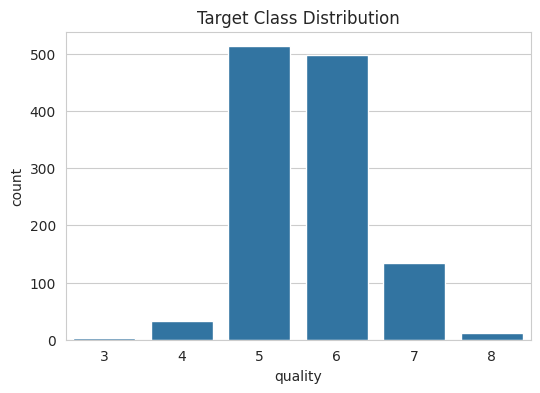

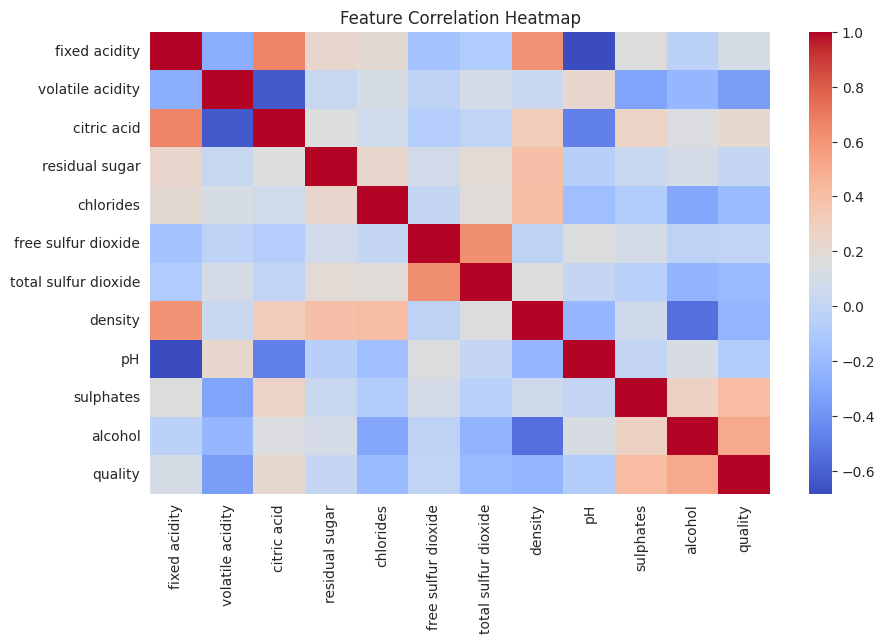

In [ ]:
# Target column assumed to be the last one
target_col = df.columns[-1]

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap (numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


4. **Data Preparation and Balancing**  

In [ ]:
# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]



# Handle imbalance using SMOTE + undersampling

class_counts = y.value_counts()
min_samples = class_counts.min()

# Set k_neighbors to be less than or equal to the minimum number of samples in any class,
# but at least 1.
k_neighbors_smote = max(1, min_samples - 1)

smote = SMOTE(random_state=42, k_neighbors=k_neighbors_smote)
under = RandomUnderSampler(random_state=42)
sampling_pipeline = Pipeline([
    ('smote', smote),
    ('under', under)
])

X_res, y_res = sampling_pipeline.fit_resample(X, y)
print(f" Data balanced successfully! Original: {X.shape} → After resampling: {X_res.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

 Data balanced successfully! Original: (1194, 11) → After resampling: (3078, 11)


5. **Model Training: Support Vector Machines (SVM)**  

In [ ]:
# SVM with Linear kernel
svm_linear = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(" Models trained successfully!")


 Models trained successfully!


6. **Model Evaluation**  


--- SVM (Linear Kernel) ---
Accuracy: 0.6867
              precision    recall  f1-score   support

           3       0.94      1.00      0.97       102
           4       0.68      0.86      0.76       102
           5       0.52      0.44      0.48       103
           6       0.46      0.39      0.42       103
           7       0.66      0.48      0.55       103
           8       0.76      0.96      0.85       103

    accuracy                           0.69       616
   macro avg       0.67      0.69      0.67       616
weighted avg       0.67      0.69      0.67       616



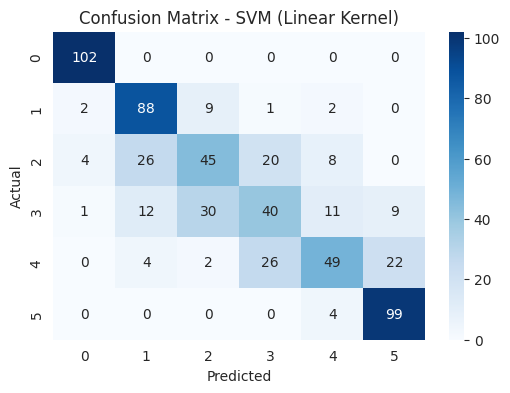

ROC-AUC: 0.9009

--- SVM (RBF Kernel) ---
Accuracy: 0.8052
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       102
           4       0.84      1.00      0.91       102
           5       0.63      0.61      0.62       103
           6       0.62      0.44      0.51       103
           7       0.79      0.79      0.79       103
           8       0.90      1.00      0.94       103

    accuracy                           0.81       616
   macro avg       0.79      0.81      0.79       616
weighted avg       0.79      0.81      0.79       616



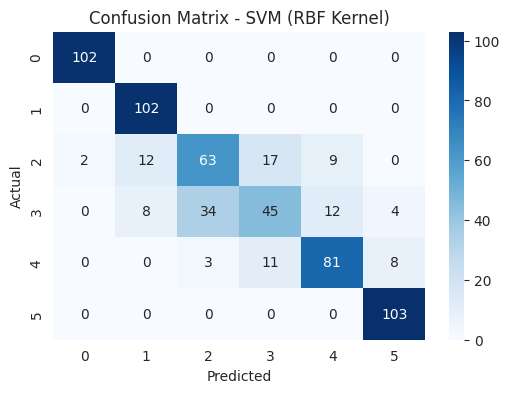

ROC-AUC: 0.9646


In [ ]:
# Function to display metrics
def evaluate_model(name, model, y_true, y_pred, X_test):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC-AUC
    try:
        roc_auc = roc_auc_score(y_true, model.predict_proba(X_test), multi_class='ovr')
        print(f"ROC-AUC: {roc_auc:.4f}")
    except:
        print("ROC-AUC skipped (target not suitable for multi-class probability).")

# Evaluate both models
evaluate_model("SVM (Linear Kernel)", svm_linear, y_test, y_pred_linear, X_test)
evaluate_model("SVM (RBF Kernel)", svm_rbf, y_test, y_pred_rbf, X_test)


7. **Model Comparison**

,Model,Accuracy
0,SVM (Linear),0.686688
1,SVM (RBF),0.805195


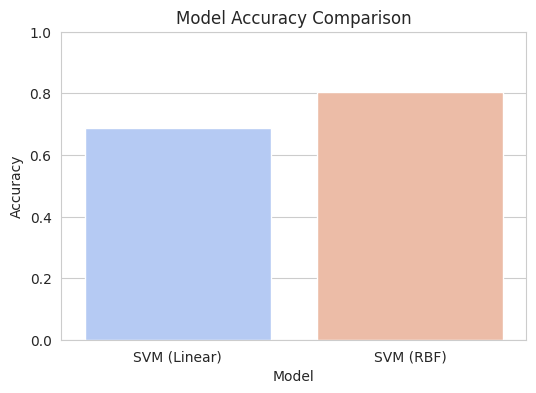

In [ ]:
results = pd.DataFrame({
    "Model": ["SVM (Linear)", "SVM (RBF)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_rbf)
    ]
})

display(results)

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


##  Model Evaluation Summary

### 🔹 SVM with Linear Kernel
**Accuracy:** 0.6867  
**ROC-AUC:** 0.9009
| Metric | Precision | Recall | F1-Score |
|:-------:|:----------:|:-------:|:----------:|
| **Weighted Average** | 0.67 | 0.69 | 0.67 |

**Observations:**
- The linear kernel achieved **moderate performance** with an overall accuracy of **≈68.7%**.  
- **Class 3** achieved the best performance (F1 = 0.97), showing the model fits well for this label.  
- **Classes 6 and 7** showed low recall (≈0.44 and 0.39), indicating **difficulty distinguishing these classes** using a linear decision boundary.  
- Overall, the **linear SVM struggles with nonlinear separability** in the dataset.

---

### 🔹 SVM with RBF Kernel
**Accuracy:** 0.8052  
**ROC-AUC:** 0.9646
| Metric | Precision | Recall | F1-Score |
|:-------:|:----------:|:-------:|:----------:|
| **Weighted Average** | 0.79 | 0.81 | 0.79 |

**Observations:**
- The **RBF kernel significantly outperformed** the linear kernel, achieving an accuracy of **≈80.5%**.  
- **Classes 3 and 8** achieved very high performance (F1 = 0.99 and 0.94), indicating **excellent classification**.  
- Moderate improvements were seen in **classes 4, 5, and 7**, thanks to the kernel’s ability to handle nonlinear relationships.  
- The **RBF kernel’s nonlinear mapping** captures **complex decision boundaries** more effectively than the linear kernel.

---

###  Conclusion
- **SVM (RBF Kernel)** outperformed the **Linear SVM** across all metrics.  
- The results suggest that the **dataset is not linearly separable**, and nonlinear kernels like **RBF** are more suitable.  
- **Future improvements** could include:
  - Hyperparameter tuning of `C` and `gamma` using **GridSearchCV**.  
  - Trying other kernels such as **Polynomial** or **Sigmoid**.  
  - Using **cross-validation** for more robust model evaluation.  
